# Impact of the laser spatio-temporal shape on Breit–Wheeler pair production

A Mercuri-Baron et al 2021 New J. Phys. 23 085006

https://iopscience.iop.org/article/10.1088/1367-2630/ac1975

(Partially) reproduced by Óscar Amaro, EPP, April 2022

In [1]:
import numpy as np
from numpy import sqrt, pi, exp, cos, sin
import matplotlib.pyplot as plt
import scipy.special
from scipy.special import genlaguerre, kv, gamma, erf
import scipy.integrate as integrate
from scipy.constants import speed_of_light, epsilon_0, elementary_charge, electron_mass, fine_structure, hbar
from scipy import optimize

# Figure 1 a

In [7]:
c1 = (3/16) * (3/2)**1.5;
c2 = 3**(2/3) * 45 * gamma(2/3)**4 /(56*pi**2) ;

# define functions
# equation 3 needs to be divided by ~1.4 for the figure to match the paper???
def eq3(chi) : return sqrt(3)/(2*pi)/1.4 *  integrate.quad(lambda xi: 1/(xi*(1-xi)) * ( 2/(3*xi)*(1-2*xi)/(1-xi)*kv(5/3, 2/(3*chi*xi*(1-xi))) + kv(2/3, 2/(3*chi*xi*(1-xi))) ), 0, 1)[0]
def eq3der(chi): return (eq3(chi+1e-3)-eq3(chi-1e-3))/(2e-3)
def eq4(chi) : return 0.242* kv(1/3, 4/(3*chi))**2/(1 - 0.172/(1 + 0.295*chi**(2/3)))
def eq5(chi) : return c1 *chi * exp(-8/(3*chi));
def eq6(chi) : return c2 *chi**(2/3);
def eqE(chi) : return 0.16 * 3/2 * kv(1/3, 4/(3*chi)) **2

# chi list
dchi = 0.03;
chilst1 = np.arange(-0.5, 3, dchi)
chilst2 = np.arange(-0.5, 1, dchi)
chilst3 = np.arange(1.1, 3, dchi)

# apply functions to chi
eq3lst = np.array([eq3(10**chi) for chi in chilst1])
eq4lst = np.array([eq4(10**chi) for chi in chilst1])
eq5lst = np.array([eq5(10**chi) for chi in chilst2])
eq6lst = np.array([eq6(10**chi) for chi in chilst3])
eqElst = np.array([eqE(10**chi) for chi in chilst1])

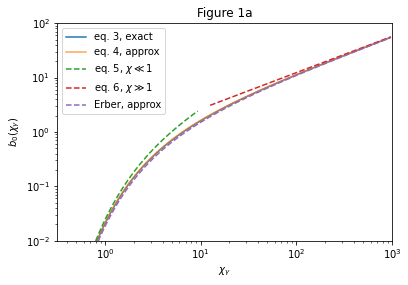

In [3]:
plt.plot(10**chilst1, eq3lst, label='eq. 3, exact')
plt.plot(10**chilst1, eq4lst, label='eq. 4, approx', alpha=0.7)
plt.plot(10**chilst2, eq5lst, '--', label='eq. 5, $\chi \ll 1$')
plt.plot(10**chilst3, eq6lst, '--', label='eq. 6, $\chi \gg 1$')
plt.plot(10**chilst1, eqElst, '--', label='Erber, approx')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\chi_\gamma$')
plt.ylabel(r'$b_0(\chi_\gamma)$')
plt.title(r'Figure 1a')
plt.xlim([10**-0.5,10**3])
plt.ylim([10**-2,10**2])
plt.legend()
plt.show()

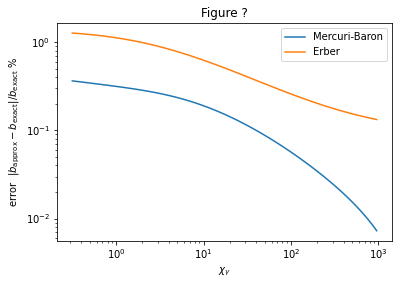

In [4]:
plt.plot(10**chilst1, 10*np.abs(eq3lst-eq4lst)/np.abs(eq3lst), label='Mercuri-Baron')
plt.plot(10**chilst1, 10*np.abs(eq3lst-eqElst)/np.abs(eq3lst), label='Erber')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\chi_\gamma$')
plt.ylabel(r'error $~|b_\mathrm{approx}-b_\mathrm{exact}|/b_\mathrm{exact} ~\%$')
plt.title(r'Figure ?')
plt.show()

# Figure 1 b + inset

In [8]:
def psi_eps(phi, eps): return sqrt((sin(phi)**2+eps**2*cos(phi)**2)/(1+eps**2))

def I_eps(chi0, eps): return integrate.quad(lambda phi: eq3(chi0*psi_eps(phi,eps)), 0, pi )[0]

def eq22(chi0):
    c3 = 27*sqrt(pi/2)/64
    c4 = 9*sqrt(3)*pi/64
    #return c4*chi0*exp(-8*sqrt(2)/(3*chi0))
    return c3*(1)*1*chi0**1.5*exp(-8/(3*chi0))

def eq23(chi0):
    c5 = 1.789
    return c5* 1/pi* integrate.quad(lambda phi: sin(phi)**(2/3),0,pi )[0] *chi0**(2/3)

In [6]:
chi0lst = 10**np.linspace(-0.5,2,100)
psi_epslst_LP = np.array([I_eps(chi0,0) for chi0 in chi0lst])
psi_epslst_CP = np.array([I_eps(chi0,1) for chi0 in chi0lst])
eq22lst = np.array([eq22(chi0) for chi0 in chi0lst])
eq23lst = np.array([eq23(chi0) for chi0 in chi0lst])

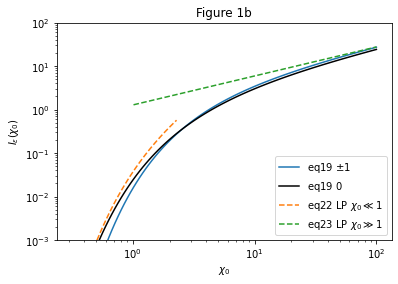

In [7]:
plt.plot(chi0lst, psi_epslst_CP, label=r'eq19 $\pm 1$')
plt.plot(chi0lst, psi_epslst_LP,'k', label=r'eq19 $0$')
plt.plot(chi0lst[:35], eq22lst[:35],'--', label=r'eq22 LP $\chi_0\ll 1$')
plt.plot(chi0lst[20:], eq23lst[20:],'--', label=r'eq23 LP $\chi_0\gg 1$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\chi_0$')
plt.ylabel(r'$I_\varepsilon(\chi_0)$')
plt.ylim([1e-3,1e2])
plt.title(r'Figure 1b')
plt.legend()
plt.show()

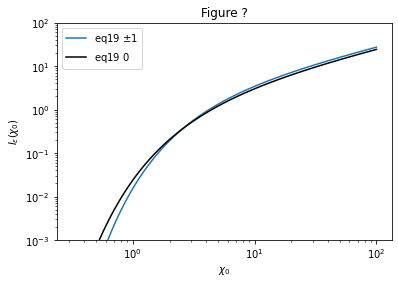

In [8]:
plt.plot(chi0lst, psi_epslst_CP, label=r'eq19 $\pm 1$')
plt.plot(chi0lst, psi_epslst_LP,'k', label=r'eq19 $0$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\chi_0$')
plt.ylabel(r'$I_\varepsilon(\chi_0)$')
plt.ylim([1e-3,1e2])
plt.title(r'Figure ?')
plt.legend()
plt.show()

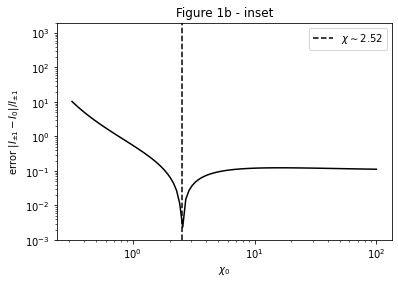

In [9]:
plt.plot(chi0lst, np.abs(psi_epslst_LP-psi_epslst_CP)/psi_epslst_CP, 'k')
plt.plot(0*np.linspace(0,1)+2.52, np.linspace(1e-3,2e3) , 'k--', label=r'$\chi\sim2.52$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\chi_0$')
plt.legend()
plt.ylabel(r'error $|I_{\pm 1}-I_0|/I_{\pm 1}$')
plt.ylim([1e-3,2e3])
plt.title(r'Figure 1b - inset')
plt.show()

# Figure 2

The actual dimensionaly correct BW rate is defined in equation 2.

In [10]:
re = elementary_charge**2/(4*pi * epsilon_0 * electron_mass * speed_of_light**2)
tau_e = re/speed_of_light
W0 = 2*fine_structure**2/(3*tau_e)

gg = 1e3; #[]
aS = 329719; #[] for lbd=0.8 micron

# since 2*gg*82/329719 = 0.49739323484542897, lbd=0.8 micron

# equation 2
def WBW(chi): return W0*eq3(chi)/gg

def eq9_CP(t, a0):
    return 1 - exp( -integrate.quad(lambda t: WBW(2*gg*a0/aS /sqrt(2)), 0, t )[0] )

def eq9_LP(t, a0):
    return 1 - exp( -integrate.quad(lambda t: WBW(2*gg*a0/aS * np.abs(sin(2*(2*pi*speed_of_light/(0.8e-6))*t)) + 1e-15),0,t )[0] )

def eq20_LP(t, a0):
    tau = 2*pi/(2*pi*speed_of_light/(0.8e-6))
    def Ffun(s): return sqrt(2/pi) * s * erf(pi*sqrt(2)/(4*s))
    def cfun(chi): return sqrt(2/3*eq3(chi)/chi/eq3der(chi) )
    Rmtau4 = t * 4/tau * W0/(2*(2*pi*speed_of_light/(0.8e-6))*gg) * pi*eq3( 2*gg*a0/aS ) * Ffun( sqrt(1.5)*cfun(2*gg*a0/aS) )
    return 1 - exp( -Rmtau4 )

def eq25_LP(t, a0):
    tau = 2*pi/(2*pi*speed_of_light/(0.8e-6))
    Rmtau4 = t * 4/tau * W0/(2*(2*pi*speed_of_light/(0.8e-6))*gg) * integrate.quad(lambda phi: eq3( 2*gg*a0/aS * np.abs(np.sin(phi))+1e-15 ), 0, pi)[0]
    return 1 - exp( -Rmtau4 )

### Figure 2 a)

In [11]:
tlst = np.linspace(0,2*pi/(2*pi*speed_of_light/(0.8e-6)),50)
fig2_a_CP = np.array([eq9_CP(t,82) for t in tlst])
fig2_a_LP = np.array([eq9_LP(t,82) for t in tlst])
fig2_a_20_LP = np.array( [eq20_LP(t,82) for t in tlst] )
fig2_a_25_LP = np.array( [eq25_LP(t,82) for t in tlst] )

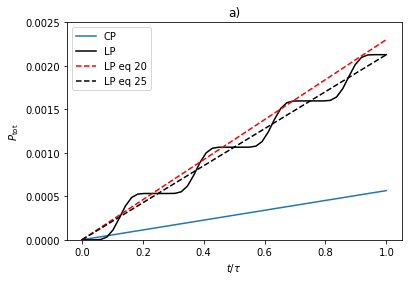

In [12]:
plt.plot(tlst/(2*pi/(2*pi*speed_of_light/(0.8e-6))), fig2_a_CP, label=r'CP')
plt.plot(tlst/(2*pi/(2*pi*speed_of_light/(0.8e-6))), fig2_a_LP, 'k-', label=r'LP')
plt.plot(tlst/(2*pi/(2*pi*speed_of_light/(0.8e-6))), fig2_a_20_LP, 'r--', label=r'LP eq 20')
plt.plot(tlst/(2*pi/(2*pi*speed_of_light/(0.8e-6))), fig2_a_25_LP, 'k--', label=r'LP eq 25')
plt.ylim([0,0.0025])
plt.legend(loc='upper left')
plt.xlabel(r'$t/\tau$')
plt.ylabel(r'$P_\mathrm{tot}$')
plt.title(r'a)')
plt.show()

### Figure 2 b)

In [13]:
tlst = np.linspace(0,2*pi/(2*pi*speed_of_light/(0.8e-6)),50)
fig2_b_CP = np.array([eq9_CP(t,660) for t in tlst])
fig2_b_LP = np.array([eq9_LP(t,660) for t in tlst])
fig2_b_20_LP = np.array( [eq20_LP(t,660) for t in tlst] )
fig2_b_25_LP = np.array( [eq25_LP(t,660) for t in tlst] )

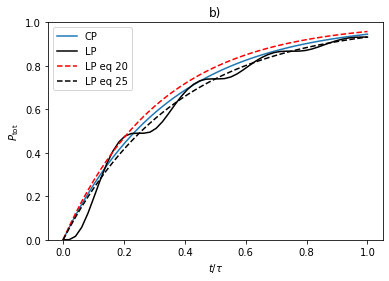

In [14]:
plt.plot(tlst/(2*pi/(2*pi*speed_of_light/(0.8e-6))), fig2_b_CP, label=r'CP')
plt.plot(tlst/(2*pi/(2*pi*speed_of_light/(0.8e-6))), fig2_b_LP, 'k-', label=r'LP')
plt.plot(tlst/(2*pi/(2*pi*speed_of_light/(0.8e-6))), fig2_b_20_LP, 'r--', label=r'LP eq 20')
plt.plot(tlst/(2*pi/(2*pi*speed_of_light/(0.8e-6))), fig2_b_25_LP, 'k--', label=r'LP eq 25')
plt.legend(loc='upper left')
plt.xlabel(r'$t/\tau$')
plt.ylabel(r'$P_\mathrm{tot}$')
plt.ylim([0,1])
plt.title(r'b)')
plt.show()

# Minima of $I_\varepsilon$ contourlines

Root should be at $\chi=16.5$ (code is getting $\chi \sim 17$).

In [24]:
def eq3(chi) : return sqrt(3)/(2*pi)/1.4 *  integrate.quad(lambda xi: 1/(xi*(1-xi)) * ( 2/(3*xi)*(1-2*xi)/(1-xi)*kv(5/3, 2/(3*chi*xi*(1-xi))) + kv(2/3, 2/(3*chi*xi*(1-xi))) ), 0, 1)[0]
def psi_eps(phi, eps): return sqrt((sin(phi)**2+eps**2*cos(phi)**2)/(1+eps**2))
def I_eps(chi0, eps): return integrate.quad(lambda phi: eq3(chi0*psi_eps(phi,eps)), 0, pi )[0]

In [ ]:
chilst = np.linspace(14, 18, 10)
eq26lst = np.array([(I_eps(chi+1e-3,0)-I_eps(chi-1e-3,0))/(2e-3) - I_eps(chi,0)/chi for chi in chilst])

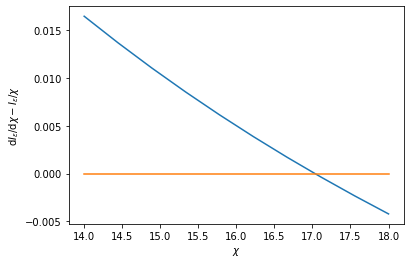

In [25]:
plt.plot(chilst, eq26lst)
plt.plot(chilst, eq26lst*0)
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\mathrm{d}I_\varepsilon/\mathrm{d}\chi - I_\varepsilon/\chi$')
plt.show()

# Figure 5

Instead of solving equation 28 numerically, we calculate the $u$-field for an array of $\rho$ values (equation 27) and select the maximum.

In [4]:
lbd = 0.8
W0 = 3*lbd
zR = pi*W0**2/lbd #[\mu m]

xlst = np.linspace(-10,+10,200)
X, Y = np.meshgrid(xlst, xlst)

def fact(x):
    """factorial"""
    return scipy.special.factorial(x)

def upl27(x,y,z,p,ell):
    """
    equation 27
    """
    rho = sqrt(x**2+y**2)
    phi = np.arctan2(y,x)
    Cpl = sqrt(2*fact(p)/np.pi/fact(p+np.abs(ell)))
    W = W0*sqrt(1+(z/zR)**2)
    psipl = (2*p+np.abs(ell)+1)*np.arctan(z/zR)
    
    res = Cpl* W0/W *(sqrt(2)*rho/W)**np.abs(ell) * genlaguerre(p,np.abs(ell),False)(2*(rho/W)**2) * exp(-(rho/W)**2) * exp( -1j*psipl + 1j*ell*phi + 1j*z/zR*(rho/W)**2 )
    return res

uplfig5_ell0 = np.abs( np.real( upl27(X,Y,0,0,0) ) )
uplfig5_ell1 = np.abs( np.real( upl27(X,Y,0,0,1) ) )
uplfig5_ell2 = np.abs( np.real( upl27(X,Y,0,0,2) ) )
uplfig5_ell3 = np.abs( np.real( upl27(X,Y,0,0,3) ) )

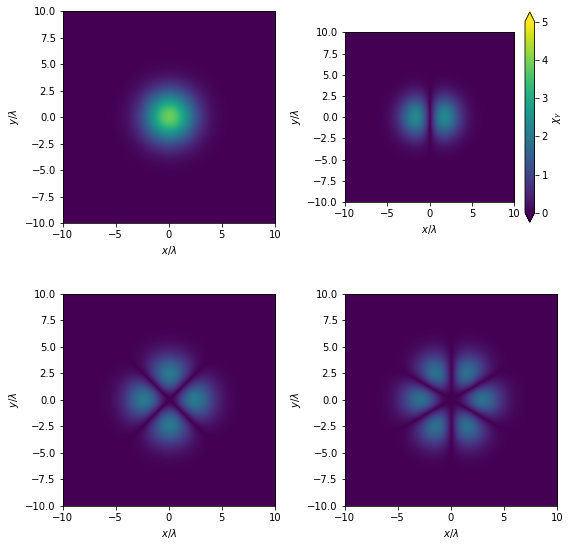

In [6]:
# p=0,ell=2
# a0 = 2000
# gg = 400
# lbd = 0.8 -> aS~329458.4
# chi0 = 2*400*2000/329458.4
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

ax_ell2 = axes[0,0].imshow(uplfig5_ell0*2*400*2000/329458.4, extent=(-10, +10, -10, +10), vmin=0,vmax=5)
axes[0,0].set_xlabel(r'$x/\lambda$')
axes[0,0].set_ylabel(r'$y/\lambda$')

ax_ell2 = axes[0,1].imshow(uplfig5_ell1*2*400*2000/329458.4, extent=(-10, +10, -10, +10), vmin=0,vmax=5)
cbar = fig.colorbar(ax_ell2, ax=axes[0,1], anchor=(0, 0.3), shrink=0.9, extend='both')
axes[0,1].set_xlabel(r'$x/\lambda$')
axes[0,1].set_ylabel(r'$y/\lambda$')
cbar.set_label(r'$\chi_\gamma$')

ax_ell2 = axes[1,0].imshow(uplfig5_ell2*2*400*2000/329458.4, extent=(-10, +10, -10, +10), vmin=0,vmax=5)
axes[1,0].set_xlabel(r'$x/\lambda$')
axes[1,0].set_ylabel(r'$y/\lambda$')

ax_ell2 = axes[1,1].imshow(uplfig5_ell3*2*400*2000/329458.4, extent=(-10, +10, -10, +10), vmin=0,vmax=5)
axes[1,1].set_xlabel(r'$x/\lambda$')
axes[1,1].set_ylabel(r'$y/\lambda$')

plt.tight_layout()
plt.show()

In [7]:
def u0lmax(l,z):
    "equation 29"
    res = 1/sqrt(1+(z/zR)**2) * np.abs(l)**(np.abs(l)/2) * exp(-np.abs(l)/2) / sqrt( gamma(np.abs(l)+1) )
    return res

def upl(rho,phi,z,p,l):
    """
    equation 27
    """
    z=0
    Cpl = sqrt(2*fact(p)/np.pi/fact(p+np.abs(l)))
    W = W0*sqrt(1+(z/zR)**2)
    psipl = (2*p+np.abs(l)+1)*np.arctan(z/zR)
    
    res = Cpl* W0/W *(sqrt(2)*rho/W)**np.abs(l) * genlaguerre(p,np.abs(l),False)(2*(rho/W)**2) * exp(-(rho/W)**2) * exp( -1j*psipl + 1j*l*phi + 1j*z/zR*(rho/W)**2 )
    return res

def eq28solve(p,l):
    rholst = np.linspace(0,13,200)
    return np.max( np.array([ np.abs(upl(rho,0,0,p,l)) for rho in rholst]) )

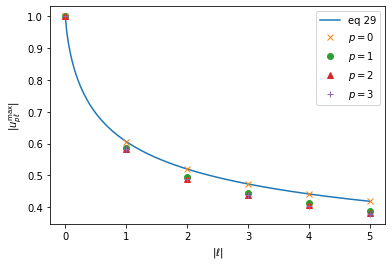

In [8]:
llst = np.arange(0,6)

eq28_0 = np.array([eq28solve(0,l) for l in llst])
eq28_1 = np.array([eq28solve(1,l) for l in llst])
eq28_2 = np.array([eq28solve(2,l) for l in llst])
eq28_3 = np.array([eq28solve(3,l) for l in llst])

plt.plot(np.linspace(0,5,200), u0lmax(np.linspace(0,5,200),0),'-',label='eq 29')
plt.plot(llst, eq28_0/eq28_0[0],'x',label='$p=0$') #/eq28_0[0]
plt.plot(llst, eq28_1/eq28_1[0],'o',label='$p=1$') #
plt.plot(llst, eq28_2/eq28_2[0],'^',label='$p=2$') #/eq28solve(2,0)
plt.plot(llst, eq28_3/eq28_3[0],'+',label='$p=3$') #/eq28solve(3,0)

plt.xlabel(r'$|\ell|$')
plt.ylabel(r'$|u^\mathrm{max}_{p\ell}|$')
plt.legend()
plt.show()